# 국제 축구 경기 분석
- 1872년부터 2918년까지 전 세계에서 개최된 국제 축구 대회 데이터를 분석한다.
- 데이터셋에 6년간 대한민국 축구팀 경기 결과를 분석해봅시다

## 필수 라이브러리 로딩


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
!pip install wordcloud

In [3]:
import seaborn as sns
from wordcloud import WordCloud
# 한글 패키지 Kanlpy

In [4]:
soccer = pd.read_csv('soccer.csv')
soccer.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41540 non-null  object
 1   home_team   41540 non-null  object
 2   away_team   41540 non-null  object
 3   home_score  41540 non-null  int64 
 4   away_score  41540 non-null  int64 
 5   tournament  41540 non-null  object
 6   city        41540 non-null  object
 7   country     41540 non-null  object
 8   neutral     41540 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [6]:
# soccer.astype(['date':'datetime64[ns]'])
soccer.date = pd.to_datetime(soccer.date)
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        41540 non-null  datetime64[ns]
 1   home_team   41540 non-null  object        
 2   away_team   41540 non-null  object        
 3   home_score  41540 non-null  int64         
 4   away_score  41540 non-null  int64         
 5   tournament  41540 non-null  object        
 6   city        41540 non-null  object        
 7   country     41540 non-null  object        
 8   neutral     41540 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.6+ MB


In [7]:
# date 컬럼을 기준으로 내림차순 정렬
soccer.sort_values(by='date', ascending=False)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41539,2019-11-19,Lebanon,North Korea,0,0,FIFA World Cup qualification,Beirut,Lebanon,False
41517,2019-11-19,U.S. Virgin Islands,Saint Martin,1,2,CONCACAF Nations League,Upper Bethlehem,U.S. Virgin Islands,False
41515,2019-11-19,Saint Lucia,Montserrat,0,1,CONCACAF Nations League,Gros Islet,Saint Lucia,False
41514,2019-11-19,El Salvador,Dominican Republic,2,0,CONCACAF Nations League,San Salvador,El Salvador,False
41513,2019-11-19,Mexico,Bermuda,2,1,CONCACAF Nations League,Mexico City,Mexico,False
...,...,...,...,...,...,...,...,...,...
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [20]:
# 홈경기와 원정경기를 분석
## 경기가 진행된 중립지역을 나타내는 컬럼의 값이 False 에 해당되는 데이터를 대상으로 분석
## 홈에서 이루어진 경기의 결과를 승(팀명)과 패를 담는 파생변수를 생성,
soccer.describe()

,home_score,away_score
count,41540.000000,41540.000000
mean,1.745643,1.187819
std,1.753444,1.405511
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [17]:
soccer['winner'] = None

soccer.loc[soccer['home_score'] > soccer['away_score'], 'winner'] = 'home'
soccer.loc[soccer['home_score'] == soccer['away_score'], 'winner'] = 'draw'
soccer.loc[soccer['home_score'] < soccer['away_score'], 'winner'] = 'away'

soccer['winner'].value_counts()

home    20210
away    11756
draw     9574
Name: winner, dtype: int64

<BarContainer object of 3 artists>

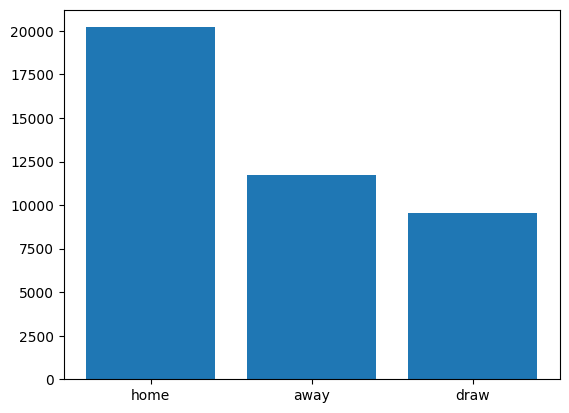

In [56]:
plt.bar(soccer['winner'].value_counts().index,soccer['winner'].value_counts().values)

In [19]:
# 홈일 때 이길확률
round(soccer.winner.value_counts().home/len(soccer) * 100, 2)

48.65

In [23]:
soccer.home_team.value_counts()

Brazil                           568
Argentina                        548
Mexico                           513
Germany                          506
England                          498
                                ... 
Central Spain                      1
Madrid                             1
St. Pierre & Miquelon              1
Sark                               1
St Vincent and the Grenadines      1
Name: home_team, Length: 309, dtype: int64

In [24]:
soccer.away_team.value_counts()

Uruguay               541
Sweden                530
England               511
Hungary               475
Paraguay              453
                     ... 
Central Spain           1
Barawa                  1
Parishes of Jersey      1
Corsica                 1
Andalusia               1
Name: away_team, Length: 306, dtype: int64

In [61]:
# 각 팀의 홈 경기에서의 승리 비율
home_win_rates = soccer[soccer['winner'] == 'home'].groupby('home_team').winner.count() / soccer.groupby('home_team').home_team.count()
soccer['home_win_rate'] = soccer['home_team'].map(home_win_rates).fillna(0)

# 고유의 홈 팀들만 설정
unique_home = soccer.drop_duplicates(subset='home_team')[['home_team', 'home_win_rate']]
unique_home.sort_values(by='home_win_rate', ascending=False).head(10)

,home_team,home_win_rate
40968,St Vincent and the Grenadines,1.000000
40639,Chameria,1.000000
40227,Parishes of Jersey,1.000000
39837,Cascadia,1.000000
764,Central Spain,1.000000
39540,Yorkshire,0.800000
16528,Jersey,0.791667
19380,Canary Islands,0.750000
24141,Monaco,0.750000
22089,Rhodes,0.727273


Text(0, 0.5, 'Frequency')

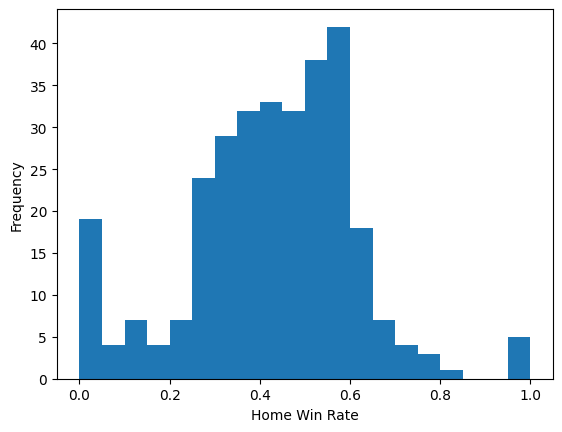

In [65]:
# 홈 경기의 승리비율 분포
plt.hist(unique_home.home_win_rate, bins=20)

plt.xlabel('Home Win Rate')
plt.ylabel('Frequency')

In [66]:
# 각 팀의 원정 경기에서의 승리 비율
away_win_rates = soccer[soccer['winner'] == 'away'].groupby('away_team').winner.count() / soccer.groupby('away_team').away_team.count()
soccer['away_win_rate'] = soccer['away_team'].map(away_win_rates).fillna(0)

# 고유의 팀 팀들만 설정
unique_away = soccer.drop_duplicates(subset='away_team')[['away_team', 'away_win_rate']]
unique_away.sort_values(by='away_win_rate', ascending=False).head(10)

,away_team,away_win_rate
39695,Surrey,1.000000
35166,Andalusia,1.000000
693,Asturias,1.000000
6434,Corsica,1.000000
21686,Kernow,1.000000
36010,County of Nice,0.800000
28808,Crimea,0.750000
410,Basque Country,0.640000
30431,Padania,0.600000
30433,Arameans Suryoye,0.571429


Text(0, 0.5, 'Frequency')

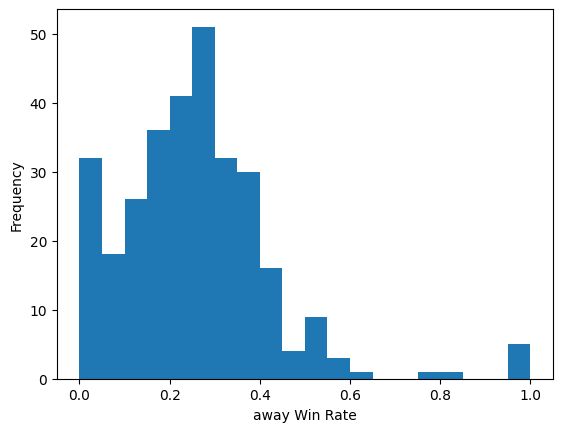

In [68]:
# 원정 경기에서 승리 비율 분포
plt.hist(unique_away.away_win_rate, bins=20)

plt.xlabel('away Win Rate')
plt.ylabel('Frequency')

In [70]:
# 나라별 홈에서 이길 확률
home_win_country = soccer[soccer['winner'] == 'home'].groupby('country')['winner'].count() / soccer.groupby('country')['country'].count()
soccer['home_win_country'] = soccer['country'].map(home_win_country).fillna(0)
# 고유의 나라들만 설정하기
unique_countries = soccer.drop_duplicates(subset='country')[['country', 'home_win_country']]
unique_countries.sort_values(by='home_win_country', ascending=False).head(10)


,country,home_win_country
3099,Gold Coast,1.000000
2241,Bohemia and Moravia,1.000000
3488,Portuguese Guinea,1.000000
4714,Mali Federation,1.000000
22142,Micronesia,1.000000
5449,Lautoka,1.000000
21477,Cook Islands,0.800000
981,Czech Republic,0.688525
2281,Croatia,0.671875
3268,Nigeria,0.649038


Text(0, 0.5, 'Frequency')

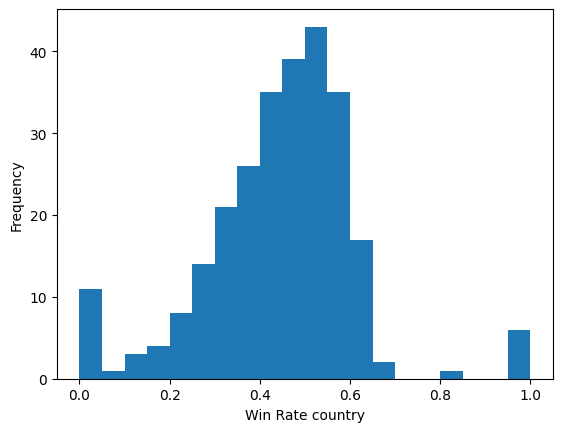

In [71]:
# 나라별 경기에서 승리 비율 분포
plt.hist(unique_countries.home_win_country, bins=20)

plt.xlabel('Win Rate country')
plt.ylabel('Frequency')

In [57]:
# 중립국가별 홈에서 이길 확률
soccer[soccer['winner'] == 'home'].groupby('neutral')['winner'].count() / soccer.groupby('neutral')['neutral'].count()

neutral
False    0.504714
True     0.430982
dtype: float64